<a href="https://colab.research.google.com/github/abdullah-azeemi/Book-Recommendation-Engine-using-KNN-Module/blob/main/Yale%20Faces%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [101]:
import os

In [102]:
folder_path = "/content/drive/MyDrive/yalefaces"

In [103]:
def read_images(folder_path, imageName):
  images = []
  for i in range (1,11):
    if i<=9:
      path = folder_path + '/' + 'subject0'+str(i) + '/subject0' + str(i) + '.' + imageName+".png"
    else:
      path = folder_path + '/' + 'subject'+str(i) + '/subject' + str(i) + '.' + imageName+".png"
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    images.append(image)
  return images

In [104]:
happyImages = read_images(folder_path, 'happy')[:11]
saadImages = read_images(folder_path, 'sad')[:11]
normalImages = read_images(folder_path, 'normal')[:11]
sleepyImages = read_images(folder_path, 'sleepy')[:11]
suprisedImages = read_images(folder_path, 'suprised')[:11]
winkImages = read_images(folder_path, 'wink')[:11]

train_images_expressions = []
train_images_expressions.append(happyImages)
train_images_expressions.append(saadImages)
train_images_expressions.append(normalImages)
train_images_expressions.append(sleepyImages)
train_images_expressions.append(suprisedImages)
train_images_expressions.append(winkImages)


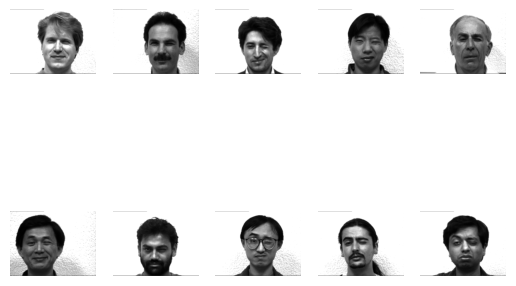

In [105]:
#Testing whether tha images are read correctly
def printImages(images_array):
    i =0
    for image in images_array:
        plt.subplot(2, 5, i+1)
        i+=1
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

def printImages2(images_array):
    i =0
    for image in images_array:
        plt.subplot(2, 3, i+1)
        i+=1
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        if i == 5:
          break
    plt.show()
images_array = np.array(winkImages)
printImages(images_array)

In [106]:
#randomly selecting images for testing
x = ['happy', 'sad', 'wink', 'normal', 'sleepy', 'suprised']
def readRandom(folder_path):
  test_images = []
  for i in range(0,6):
    index = np.random.randint(11,15)
    path = folder_path + '/' + 'subject' + str(index) + '/' + 'subject' + str(index) + '.' + x[i] + '.png'
    print(path)
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    test_images.append(image)
  return test_images

/content/drive/MyDrive/yalefaces/subject14/subject14.happy.png
/content/drive/MyDrive/yalefaces/subject11/subject11.sad.png
/content/drive/MyDrive/yalefaces/subject14/subject14.wink.png
/content/drive/MyDrive/yalefaces/subject12/subject12.normal.png
/content/drive/MyDrive/yalefaces/subject13/subject13.sleepy.png
/content/drive/MyDrive/yalefaces/subject12/subject12.suprised.png


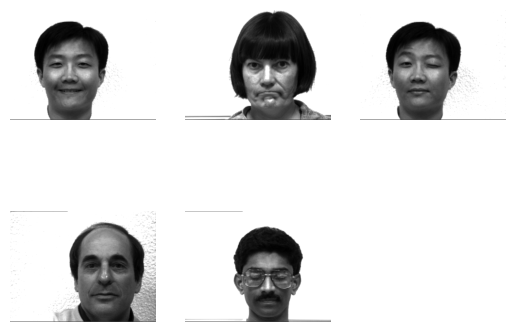

In [107]:
test_images_expressions = readRandom(folder_path)
printImages2(test_images_expressions)

In [108]:
def calculateX_reduced(trainImages):
  newImage = trainImages - np.mean(trainImages,axis=0)
  for i in range(newImage.shape[0]):
    con_vat = np.cov(trainImages[i], rowvar = True)
  eigen_vlaues, eigen_vectors = np.linalg.eig(con_vat)
  sorted_index = np.argsort(eigen_vlaues)
  sorted_index = sorted_index[::-1]
  sorted_eigenvalue = eigen_vlaues[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  np.components = 2
  eigenvector_subsets = sorted_eigenvectors[:,0:np.components]
  X_reduced = np.dot(eigenvector_subsets.T, newImage.T).T
  return X_reduced

In [109]:
test_images_expressions

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 146, 132, 147],
        [248, 245, 244, ..., 142, 129, 140],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 241, 241],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 128, 108, ..., 253, 244, 255],
        [255, 255, 220, ..., 249, 243, 255],
        [246, 22

In [110]:
xhappy = calculateX_reduced(happyImages)

In [111]:
xhappy.shape

(10, 320, 2)

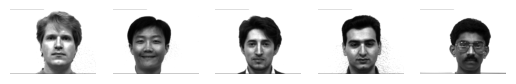

(5, 243, 320)

In [112]:
test_path = '/content/drive/MyDrive/TestFaces'
def read_images(subject_folder):
    images = []
    subject_path = os.path.join(test_path, subject_folder)
    for filename in os.listdir(subject_path):
        if filename.endswith(".png"):
            img_path = os.path.join(subject_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)
    return images

subject_folder = 'subject01'
test_images = read_images(test_path)[:10]
if test_images:

    test_image_array = np.array(test_images)
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_image_array[i], cmap='gray')
        plt.axis('off')
    plt.show()
else:
    print("No images found in the specified folder.")

test_images = np.array(test_images)
test_images.shape

In [113]:

def calculateX_reduced_test(test_images_expressions):
  newImage = test_images_expressions - np.mean(test_images_expressions,axis=0)
  for i in range(newImage.shape[0]):
    con_vat = np.cov(test_images_expressions[i], rowvar = True)
  eigen_vlaues, eigen_vectors = np.linalg.eig(con_vat)
  sorted_index = np.argsort(eigen_vlaues)
  sorted_index = sorted_index[::-1]
  sorted_eigenvalue = eigen_vlaues[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  np.components = 2
  eigenvector_subsets = sorted_eigenvectors[:,0:np.components]
  X_reduced = np.dot(eigenvector_subsets.T, newImage.T).T
  return X_reduced

In [114]:
def testImage(test_images, trainedImages):
    k = 3

    for test_image in test_images:
        test_image = test_image - np.mean(test_image)
        test_covariance = np.cov(test_image, rowvar=False)
        test_eigenvalues, test_eigenvectors = np.linalg.eigh(test_covariance)
        sorted_indices = np.argsort(test_eigenvalues)[::-1]
        test_eigenvalues = test_eigenvalues[sorted_indices]
        test_eigenvectors = test_eigenvectors[:, sorted_indices]
        selected_test_eigenvectors = test_eigenvectors[:, :k]
        test_projection = np.dot(test_image, selected_test_eigenvectors)
        total_train_variance = np.sum(trainedImages)
        explained_variance = np.sum(test_eigenvalues[:k])
        percentage_variance_explained = (explained_variance / total_train_variance) * 100

        print(f"Percentage by selecting the first {k} eigenvalues: {percentage_variance_explained}%")


In [115]:
testImage(test_images, xhappy)

Percentage by selecting the first 3 eigenvalues: 1.032837703674989e+19%
Percentage by selecting the first 3 eigenvalues: 1.642055079610794e+19%
Percentage by selecting the first 3 eigenvalues: 1.6822501626087997e+19%
Percentage by selecting the first 3 eigenvalues: 1.4652624079926174e+19%
Percentage by selecting the first 3 eigenvalues: 1.652531040966799e+19%


Assessing from the above output for xHappy, the pictures 2 and 3 seems to be happy.

Glasses or No Glasses Recognition

In [118]:
def read_images(folder_path, imageName):
  images = []
  for i in range (1,11):
    if i<=9:
      path = folder_path + '/' + 'subject0'+str(i) + '/subject0' + str(i) + '.' + imageName+".png"
    else:
      path = folder_path + '/' + 'subject'+str(i) + '/subject' + str(i) + '.' + imageName+".png"
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    images.append(image)
  return images

In [119]:
glassesImages = read_images(folder_path, 'glasses')[:11]
noGlassesImages = read_images(folder_path, 'noglasses')[:11]

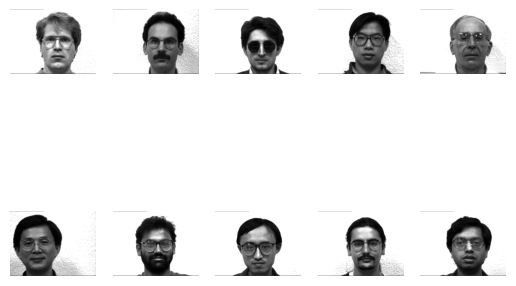

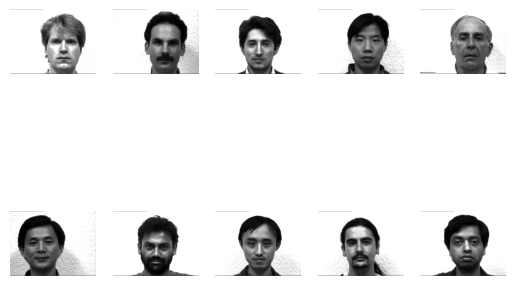

In [120]:
printImages(glassesImages)
printImages(noGlassesImages)

In [121]:
xglasses = calculateX_reduced(glassesImages)
xnoGlasses = calculateX_reduced(noGlassesImages)

In [122]:
testImages = readRandom(folder_path)

/content/drive/MyDrive/yalefaces/subject14/subject14.happy.png
/content/drive/MyDrive/yalefaces/subject14/subject14.sad.png
/content/drive/MyDrive/yalefaces/subject12/subject12.wink.png
/content/drive/MyDrive/yalefaces/subject14/subject14.normal.png
/content/drive/MyDrive/yalefaces/subject13/subject13.sleepy.png
/content/drive/MyDrive/yalefaces/subject12/subject12.suprised.png


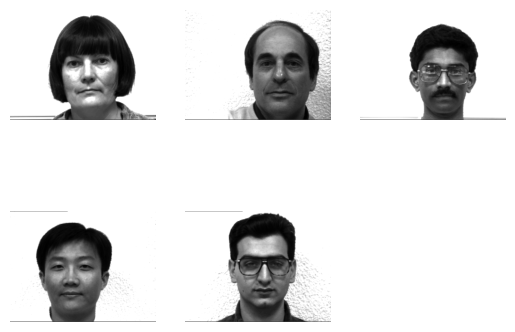

In [125]:
glassesTestpath = "/content/drive/MyDrive/GlassesTest"

glasses_test_images = []
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject11/subject11.noglasses.png",cv2.IMREAD_GRAYSCALE)
glasses_test_images.append(img)
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject12/subject12.noglasses.png",cv2.IMREAD_GRAYSCALE)
glasses_test_images.append(img)
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject13/subject13.glasses.png",cv2.IMREAD_GRAYSCALE)
glasses_test_images.append(img)
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject14/subject14.noglasses.png",cv2.IMREAD_GRAYSCALE)
glasses_test_images.append(img)
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject15/subject15.glasses.png",cv2.IMREAD_GRAYSCALE)
glasses_test_images.append(img)

printImages2(glasses_test_images)

In [127]:
testImage(test_images, xglasses)

Percentage by selecting the first 3 eigenvalues: 4.502889695396335e+18%
Percentage by selecting the first 3 eigenvalues: 7.1589107087626e+18%
Percentage by selecting the first 3 eigenvalues: 7.334150269047162e+18%
Percentage by selecting the first 3 eigenvalues: 6.388143049508381e+18%
Percentage by selecting the first 3 eigenvalues: 7.204583032953982e+18%


Here 2,3 and 5 are persons with higher percentage indicating they have wore galsses

Person Identification


In [142]:
def read_images(subject_folder):
    images = []
    train_path = "/content/drive/MyDrive/yalefaces/" + subject_folder
    subject_path = os.path.join(train_path, subject_folder)
    for filename in os.listdir(subject_path):
        if filename.endswith(".png"):
            img_path = os.path.join(subject_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(img)
    return images

def loadImages(trainPath,person):
    trainPath = trainPath+person
    train_images = read_images(trainPath)
    return train_images


subject_folder = 'subject01'
train_images = read_images(train_path)[:10]
if train_images:
    image_array = np.array(train_images)
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(image_array[i], cmap='gray')
        plt.axis('off')
    plt.show()
else:
    print("No images found in the specified folder.")


No images found in the specified folder.


In [210]:
train_path = "/content/drive/MyDrive/yalefaces/"
p1 = person1 = loadImages(train_path, 'subject01')
p2 = person2 = loadImages(train_path, 'subject02')
p3 = person3 = loadImages(train_path, 'subject03')
p4 = person4 = loadImages(train_path, 'subject04')
p5 = person5 = loadImages(train_path, 'subject05')
p6 = person6 = loadImages(train_path, 'subject06')
p7 = person7 = loadImages(train_path, 'subject07')
p8 = person8 = loadImages(train_path, 'subject08')
p9 = person9 = loadImages(train_path, 'subject09')
p10 =person10 = loadImages(train_path, 'subject10')

In [211]:
xPerson1 = calculateX_reduced(person1)
xPerson2 = calculateX_reduced(person2)
xPerson3 = calculateX_reduced(person3)
xPerson4 = calculateX_reduced(person4)
xPerson5 = calculateX_reduced(person5)
xPerson6 = calculateX_reduced(person6)
xPerson7 = calculateX_reduced(person7)
xPerson8 = calculateX_reduced(person8)
xPerson9 = calculateX_reduced(person9)
xPerson10 = calculateX_reduced(person10)

In [212]:
def generatePersonpercentage(train_data, test_image):
      mean_train = np.mean(train_data, axis=0)
      centered_train = train_data - mean_train
      cov_matrix = np.cov(centered_train, rowvar=False)
      eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
      sorted_indices = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[sorted_indices]
      eigenvectors = eigenvectors[:, sorted_indices]
      num_components = 100
      selected_eigenvalues = eigenvalues[:num_components]
      selected_eigenvectors = eigenvectors[:, :num_components]
      train_reduced = np.dot(centered_train, selected_eigenvectors)

      centered_test = test_image.flatten() - mean_train.reshape(1, -1)
      test_reduced = np.dot(centered_test, selected_eigenvectors)

      reconstructed_test = mean_train + np.dot(test_reduced, selected_eigenvectors.T)
      reconstructed_test = reconstructed_test.reshape(test_image.shape)

      loss = np.mean((test_image - reconstructed_test) ** 2)


      plt.figure(figsize=(8, 4))
      plt.subplot(1, 2, 1)
      plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
      plt.title("Original Image")

      plt.subplot(1, 2, 2)
      plt.imshow(cv2.cvtColor(reconstructed_test.astype(np.uint8), cv2.COLOR_BGR2RGB))
      plt.title("Reconstructed Image")

      plt.show()

      print("Loss:", loss)


In [213]:
person1 = np.array(xPerson1)
person2 = np.array(xPerson2)
person3 = np.array(xPerson3)
person4 = np.array(xPerson4)
person5 = np.array(xPerson5)
person6 = np.array(xPerson6)
person7 = np.array(xPerson7)
person8 = np.array(xPerson8)
person9 = np.array(xPerson9)
person10 = np.array(xPerson10)

In [214]:
img = cv2.imread("/content/drive/MyDrive/yalefaces/subject01/subject01.glasses.png",cv2.IMREAD_GRAYSCALE)
img = np.array(img)
img.shape

(243, 320)

In [215]:
person1.shape
person1 = person1.reshape((11,-1))
print(person1.shape)
print(img.shape)

(11, 640)
(243, 320)


In [217]:
generatePersonpercentage(person1,img)

ValueError: ignored

In [218]:
def testImage2(test_images, trainedImages):
    k = 3
    percentages = []
    for test_image in test_images:
        test_image = test_image - np.mean(test_image)
        test_covariance = np.cov(test_image, rowvar=False)
        test_eigenvalues, test_eigenvectors = np.linalg.eigh(test_covariance)
        sorted_indices = np.argsort(test_eigenvalues)[::-1]
        test_eigenvalues = test_eigenvalues[sorted_indices]
        test_eigenvectors = test_eigenvectors[:, sorted_indices]
        selected_test_eigenvectors = test_eigenvectors[:, :k]
        test_projection = np.dot(test_image, selected_test_eigenvectors)
        total_train_variance = np.sum(trainedImages)
        explained_variance = np.sum(test_eigenvalues[:k])
        percentage_variance_explained = (explained_variance / total_train_variance) * 100

        percentages.append(percentage_variance_explained)
    percentages = np.array(percentages)
    print(f"Percentage by selecting the first {k} eigenvalues: {percentages.mean()}%")


In [219]:
testImage2(xPerson1,img)
testImage2(xPerson2,img)
testImage2(xPerson3,img)
testImage2(xPerson4,img)
testImage2(xPerson5,img)
testImage2(xPerson6,img)
testImage2(xPerson7,img)
testImage2(xPerson8,img)
testImage2(xPerson9,img)
testImage2(xPerson10,img)

Percentage by selecting the first 3 eigenvalues: 1.6121178338330098%
Percentage by selecting the first 3 eigenvalues: 0.9862336794203945%
Percentage by selecting the first 3 eigenvalues: 2.136155595699285%
Percentage by selecting the first 3 eigenvalues: 1.4595766280491647%
Percentage by selecting the first 3 eigenvalues: 1.3943752228756265%
Percentage by selecting the first 3 eigenvalues: 2.6757586145867513%
Percentage by selecting the first 3 eigenvalues: 1.5508366186693143%
Percentage by selecting the first 3 eigenvalues: 1.7082971974178918%
Percentage by selecting the first 3 eigenvalues: 2.1961608231966245%
Percentage by selecting the first 3 eigenvalues: 1.241074284249243%


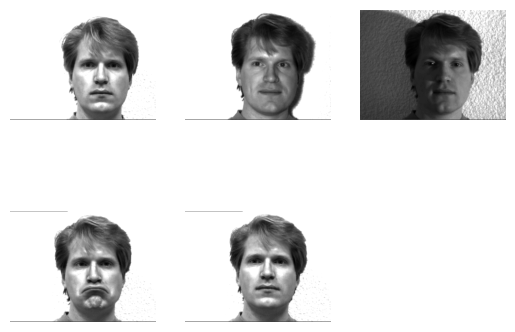

In [209]:
printImages2(p1)

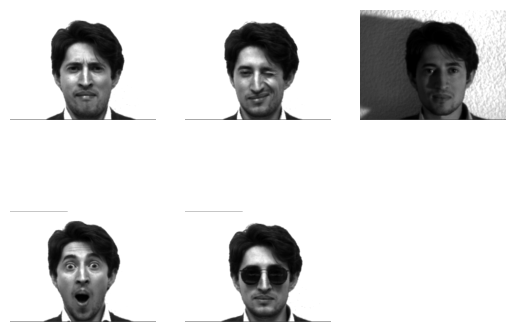

In [222]:
printImages2(p3)